In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables
Station = Base.classes.station
Measurement = Base.classes.measurement

In [7]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [8]:
# Create a session
session = Session(engine)

In [9]:
# We can view all of the classes that automap found
# Save references to each table
station = session.query(Station).first()
station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x22a59875c88>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [10]:
measurement = session.query(Measurement).first()
measurement.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x22a598bb7b8>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [11]:
for row in session.query(Measurement.prcp, Measurement.date).limit(15).all():
    print(row)

(0.08, '2010-01-01')
(0.0, '2010-01-02')
(0.0, '2010-01-03')
(0.0, '2010-01-04')
(None, '2010-01-06')
(0.06, '2010-01-07')
(0.0, '2010-01-08')
(0.0, '2010-01-09')
(0.0, '2010-01-10')
(0.01, '2010-01-11')
(0.0, '2010-01-12')
(0.0, '2010-01-14')
(0.0, '2010-01-15')
(0.0, '2010-01-16')
(0.0, '2010-01-17')


In [12]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [13]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'],c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
# Create our session (link) from Python to the DB
Base.metadata.create_all(engine)

# Exploratory Climate Analysis

In [15]:
# Calculate the date 1 year ago from the last data point in the database
lastdate = engine.execute("SELECT date FROM measurement WHERE measurement.date = (SELECT MAX(date) FROM measurement)")
list(lastdate)

[('2017-08-23',), ('2017-08-23',), ('2017-08-23',), ('2017-08-23',)]

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Perform a query to retrieve the data and precipitation scores
measure_query = engine.execute("SELECT date, prcp FROM measurement WHERE date BETWEEN '2016-08-23' and '2017-08-23'")
list(measure_query)


[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [17]:
# Save the query results as a Pandas DataFrame and set the index to the date column
conn = engine.connect()

In [18]:
data = pd.read_sql("SELECT date, prcp FROM measurement WHERE date BETWEEN '2016-08-23' and '2017-08-23'", conn)

In [19]:
data2=data.set_index('date')
data2

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [20]:
# Sort the dataframe by date
data3=data2.sort_index()
data3

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


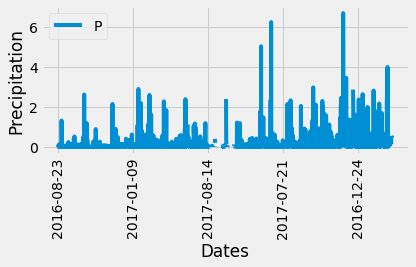

In [21]:
# Use Pandas Plotting with Matplotlib to plot the data
data.plot(x ='date', y='prcp', kind = 'line')
plt.xlabel("Dates")
plt.ylabel("Precipitation")
plt.legend("Precipitation")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("Images-Andrew/linechart.png")

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
data[["prcp"]].describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [23]:
# Design a query to show how many stations are available in this dataset?
count_station = engine.execute("SELECT COUNT ( DISTINCT station ) FROM measurement")
list(count_station)

[(9,)]

In [24]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
freq_station = engine.execute("SELECT station, count(*) as frequency FROM measurement GROUP BY station ORDER BY count(*) desc")
list(freq_station)



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
max_station = engine.execute("SELECT station, count(*) as frequency FROM measurement GROUP BY station ORDER BY count(*) desc LIMIT 1")
list(max_station)

[('USC00519281', 2772)]

In [26]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
low_temp_max_station = engine.execute("SELECT min(tobs) FROM measurement WHERE station='USC00519281'")
list(low_temp_max_station)


[(54.0,)]

In [27]:
# highest temperatureof the most active station?
high_temp_max_station = engine.execute("SELECT max(tobs) FROM measurement WHERE station='USC00519281'")
list(high_temp_max_station)

[(85.0,)]

In [28]:
#average temperature of the most active station?
avg_temp_max_station = engine.execute("SELECT avg(tobs) FROM measurement WHERE station='USC00519281'")
list(avg_temp_max_station)

[(71.66378066378067,)]

In [29]:
# Choose the station with the highest number of temperature observations.
freq_station_obs = engine.execute("SELECT station, tobs, count(tobs) as frequency FROM measurement GROUP BY station ORDER BY count(*) desc LIMIT 1")
list(freq_station_obs)




[('USC00519281', 70.0, 2772)]

In [30]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
data_tobs = pd.read_sql("SELECT date, tobs FROM measurement WHERE date BETWEEN '2016-08-23' and '2017-08-23' AND station='USC00519281'", conn)

In [31]:
# Create the bins in which Data will be held for ages 
bins = [53, 55.75, 58.5, 61.25, 64, 66.75, 69.5, 72.25, 75, 77.75, 80.5, 83.25, 86]

# Create the names for the  bins
group_names = ["<55.75", "55.75-58.5", "58.5-61.25", "61.25-64", "64-66.75", "66.75-69.5", "69.5-72.25", "72.25-75","75-77.75","77.75-80.5","80.5-83.25","83.25-86"]
# Cut them
data_tobs["tobs"] = pd.cut(data_tobs["tobs"], bins, labels=group_names, include_lowest=True)

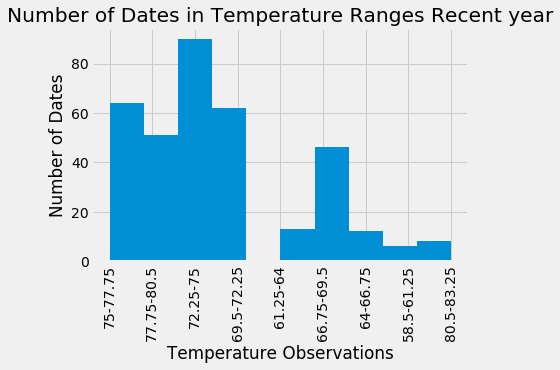

In [32]:
#Create Histogram
plt.hist(data_tobs.tobs)
plt.xlabel("Temperature Observations")
plt.ylabel("Number of Dates")
plt.xticks(rotation=90)
plt.title("Number of Dates in Temperature Ranges Recent year")
plt.savefig("Images-Andrew/Temphistogram.png")

## Bonus Challenge Assignment

In [33]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [34]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [35]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [36]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [37]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [38]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [39]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [40]:
# Plot the daily normals as an area plot with `stacked=False`
